# 0. Package

In [4]:
library(sarima)
library(ggplot2)
library(forecast)
library(data.table)
library(gridExtra)
library(fUnitRoots)
library(portes)
library(lmtest)

## Intro : ARIMA(0,0,0)(0,0,1)_12 : SMA(1)

$$ ARIMA(0,0,0)(0,0,1)_{12} =SMA(1)= Z_t = (1-\theta B^{12})\varepsilon_t$$

In [9]:
setwd("C:\\Users\\lee\\Desktop\\Í≥†Í∏âÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù\\Ï†ú5Ìåê_ÏãúÍ≥ÑÏó¥Î∂ÑÏÑù_ÌîÑÎ°úÍ∑∏Îû®\\Ï†ú5Ìåê ÏãúÍ≥ÑÏó¥Î∂ÑÏÑù data")

In [10]:
options(repr.plot.res=200,repr.plot.width=10,repr.plot.height=6)

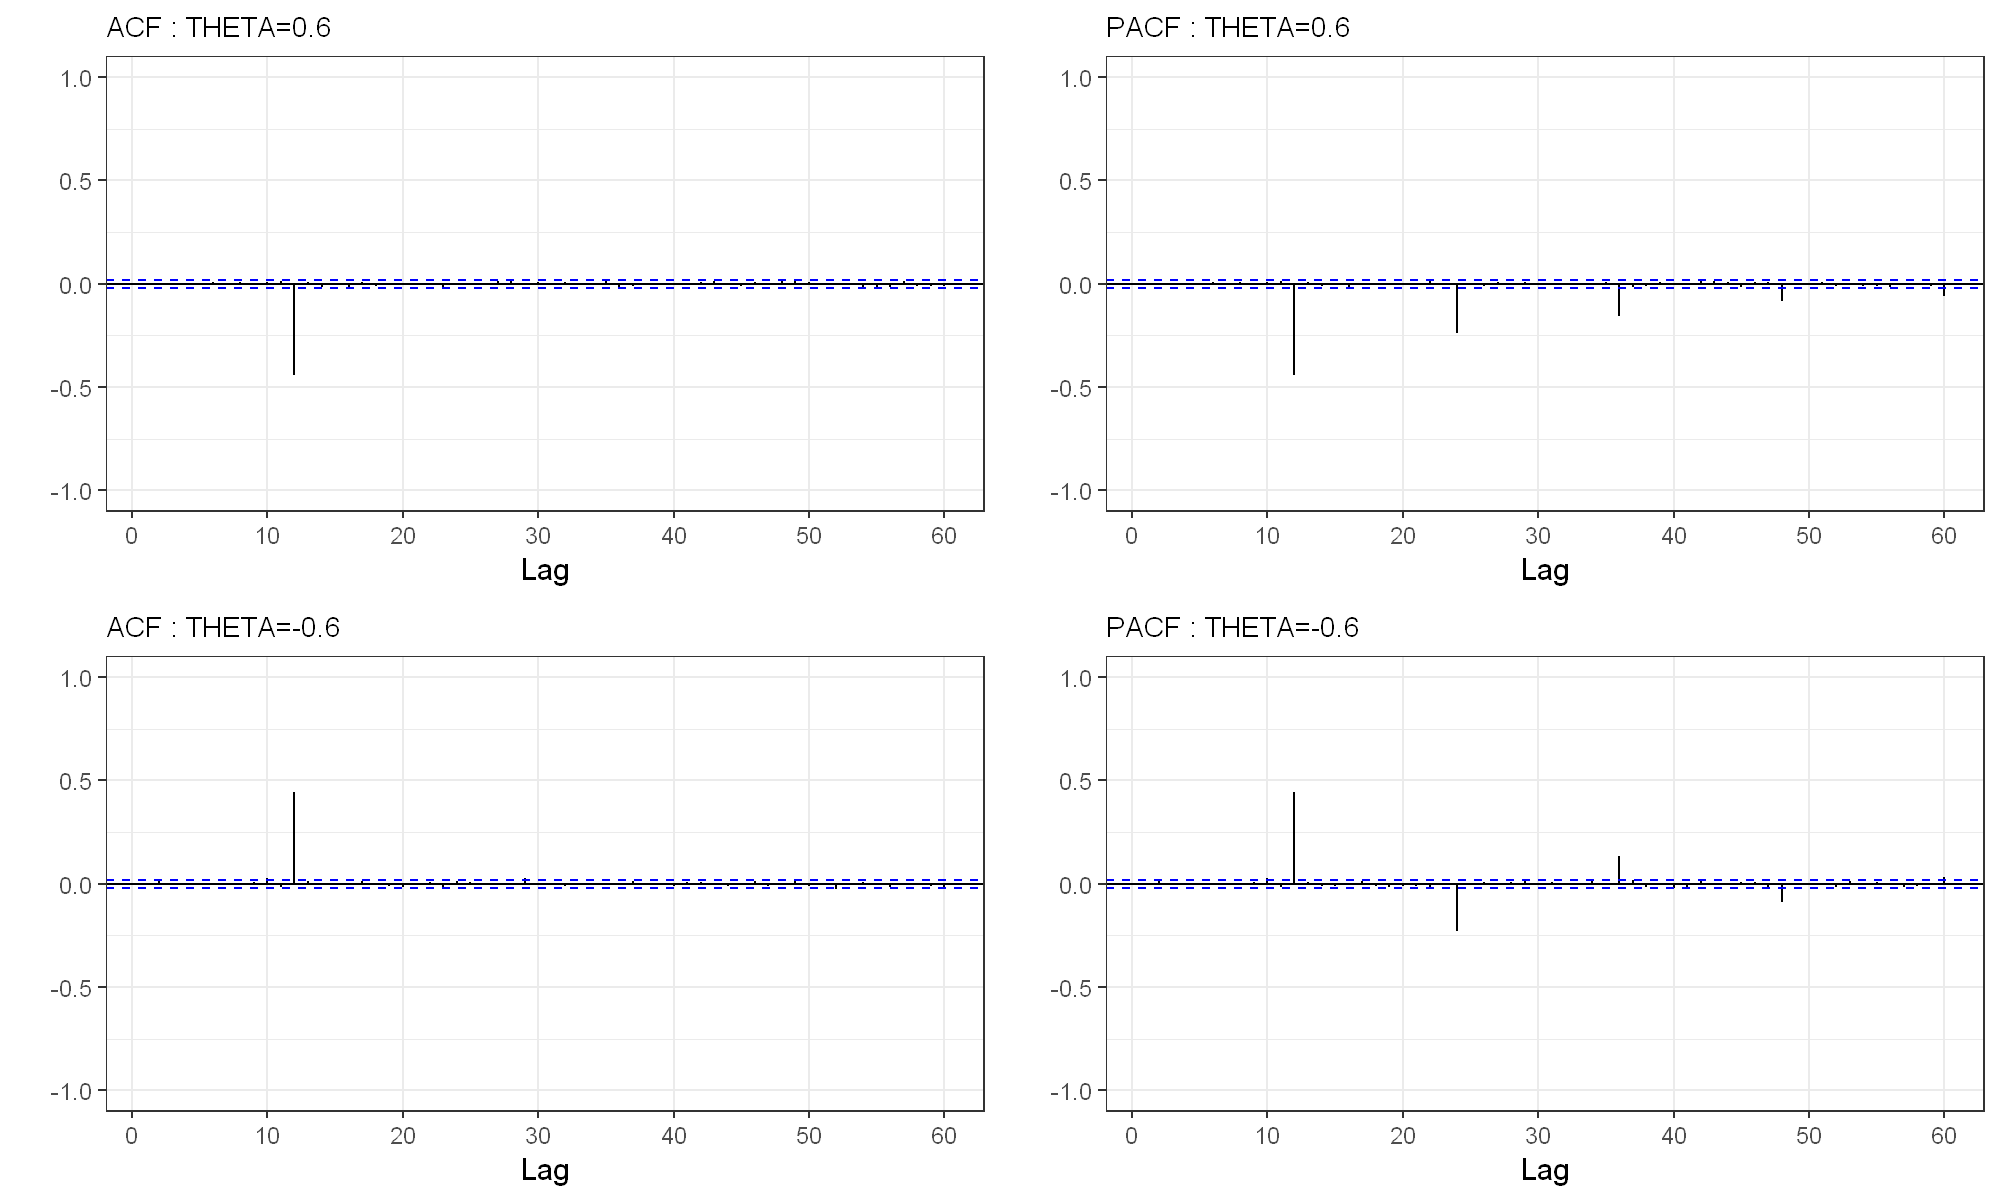

In [14]:
x <- sim_sarima(n=10000,
                model=list(sma=-0.6, nseasons=12, sigma2 = 1)) # SMA(1)
y <- sim_sarima(n=10000,
                model=list(sma=0.6, nseasons=12, sigma2 = 1)) # SMA(1)

p1 <- ggAcf(x, lag.max=60) + ylab("") +  
  theme_bw() + ylim(-1,1) + ggtitle('ACF : THETA=0.6') + 
  theme(plot.title = element_text(size=10))

p2 <- ggPacf(x, lag.max=60) + ylab("") +
  theme_bw() +ylim(-1,1)  + ggtitle('PACF : THETA=0.6')+ 
  theme(plot.title = element_text(size=10))

p3 <- ggAcf(y, lag.max=60) + ylab("") +
  theme_bw() + ylim(-1,1) + ggtitle('ACF : THETA=-0.6')+ 
  theme(plot.title = element_text(size=10))

p4 <- ggPacf(y, lag.max=60) + ylab("") +
  theme_bw() +ylim(-1,1) + ggtitle('PACF : THETA=-0.6')+ 
  theme(plot.title = element_text(size=10))


grid.arrange(p1, p2, p3, p4, nrow=2)

* Ï£ºÍ∏∞Í∞Ä  12Ïù∏ $SMA(1)$ Î™®ÌòïÏù¥ÎØÄÎ°ú  acfÍ∞íÏùÑ Î≥¥Î©¥ 12Ï∞®ÏàòÏóêÏÑú Ï†àÎã®Ïù∏ Í∞íÏùÑ Î≥º Ïàò ÏûàÎã§.

* pacfÎäî ÏßÄÏàòÏ†ÅÏúºÎ°ú Í∞êÏÜåÌïòÍ≥† ÏûàÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

* Î™®Ìòï Ï†ÅÌï©Ïãú Ìïú Í∞ÄÏßÄ Î™®ÌòïÎßå Í≥†Î†§Ìï† ÌïÑÏöîÎäî ÏóÜÏùå ÏãúÎèÑÌëú, acf, pacf Ï†àÎã®Í∞íÏùÑ Î≥¥Í≥† Îã§ÏñëÌïú Î™®Ìòï Ï§ëÏóêÏÑú Ï†ÅÏ†àÌïú Í∑ºÍ±∞Î•º ÌÜµÌï¥ ÏÑ†Ï†ïÌï† Ïàò ÏûàÎã§.

## ÏòàÏ†ú 10.2

In [16]:
tour <- scan("tourist.txt")

dt <- data.table(t = 1:length(tour),
                 z = tour)

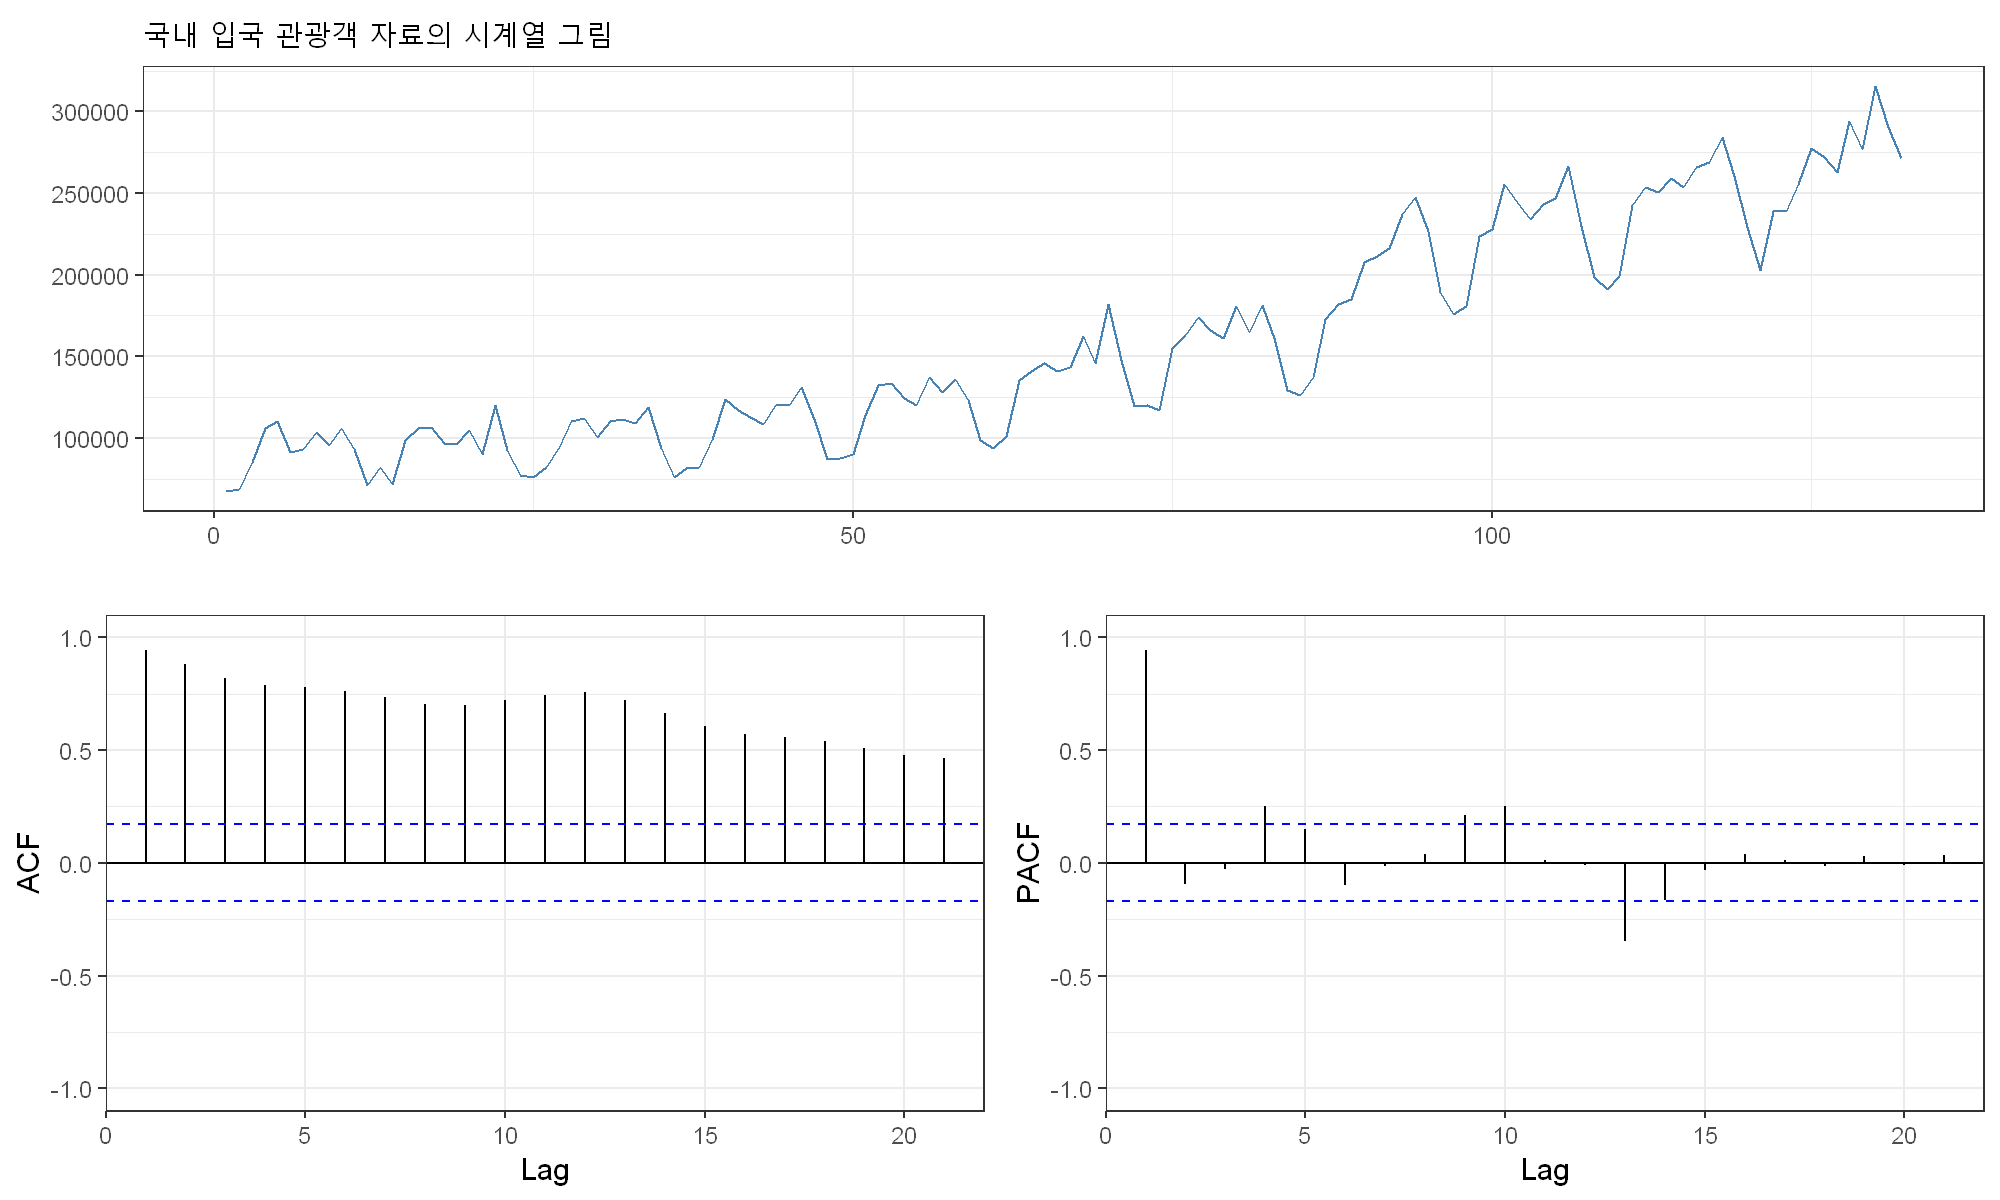

In [17]:
p3 <- ggplot(dt, aes(t, z)) + 
  geom_line(col='steelblue') +
  xlab("")+ylab('')+ ggtitle('Íµ≠ÎÇ¥ ÏûÖÍµ≠ Í¥ÄÍ¥ëÍ∞ù ÏûêÎ£åÏùò ÏãúÍ≥ÑÏó¥ Í∑∏Î¶º')+
  theme_bw()

p1 <- ggAcf(dt$z) + 
  theme_bw() + ylim(-1,1) +
  theme(plot.title = element_blank())

p2 <- ggPacf(dt$z) + 
  theme_bw() +ylim(-1,1) +
  theme(plot.title = element_blank())

grid.arrange(p3, p1, p2, nrow = 2,
             layout_matrix = rbind(c(1,1),
                                   c(2,3)))

* ÏãúÎèÑÌëúÎ•º Í∑∏Î¶∞ Í≤∞Í≥º Î∂ÑÏÇ∞ ÏïàÏ†ïÌôîÍ∞Ä ÌïÑÏöîÌï¥ Î≥¥ÏûÑ

* Î°úÍ∑∏Î≥ÄÌôò, sqrt Î≥ÄÌôò, box-coxÎ≥ÄÌôòÏùÑ Ïù¥Ïö©Ìï¥ Î≥ÄÌôò ÌõÑ ÎπÑÍµê

In [19]:
dt[, lnz := log(z)]
dt[, sqrtz := sqrt(z)]
dt[, boxcoxz := BoxCox(z,lambda= BoxCox.lambda(z))]

### Î∂ÑÏÇ∞ ÏïàÏ†ïÌôî Î≥ÄÌôò ÌõÑ ÎπÑÍµê

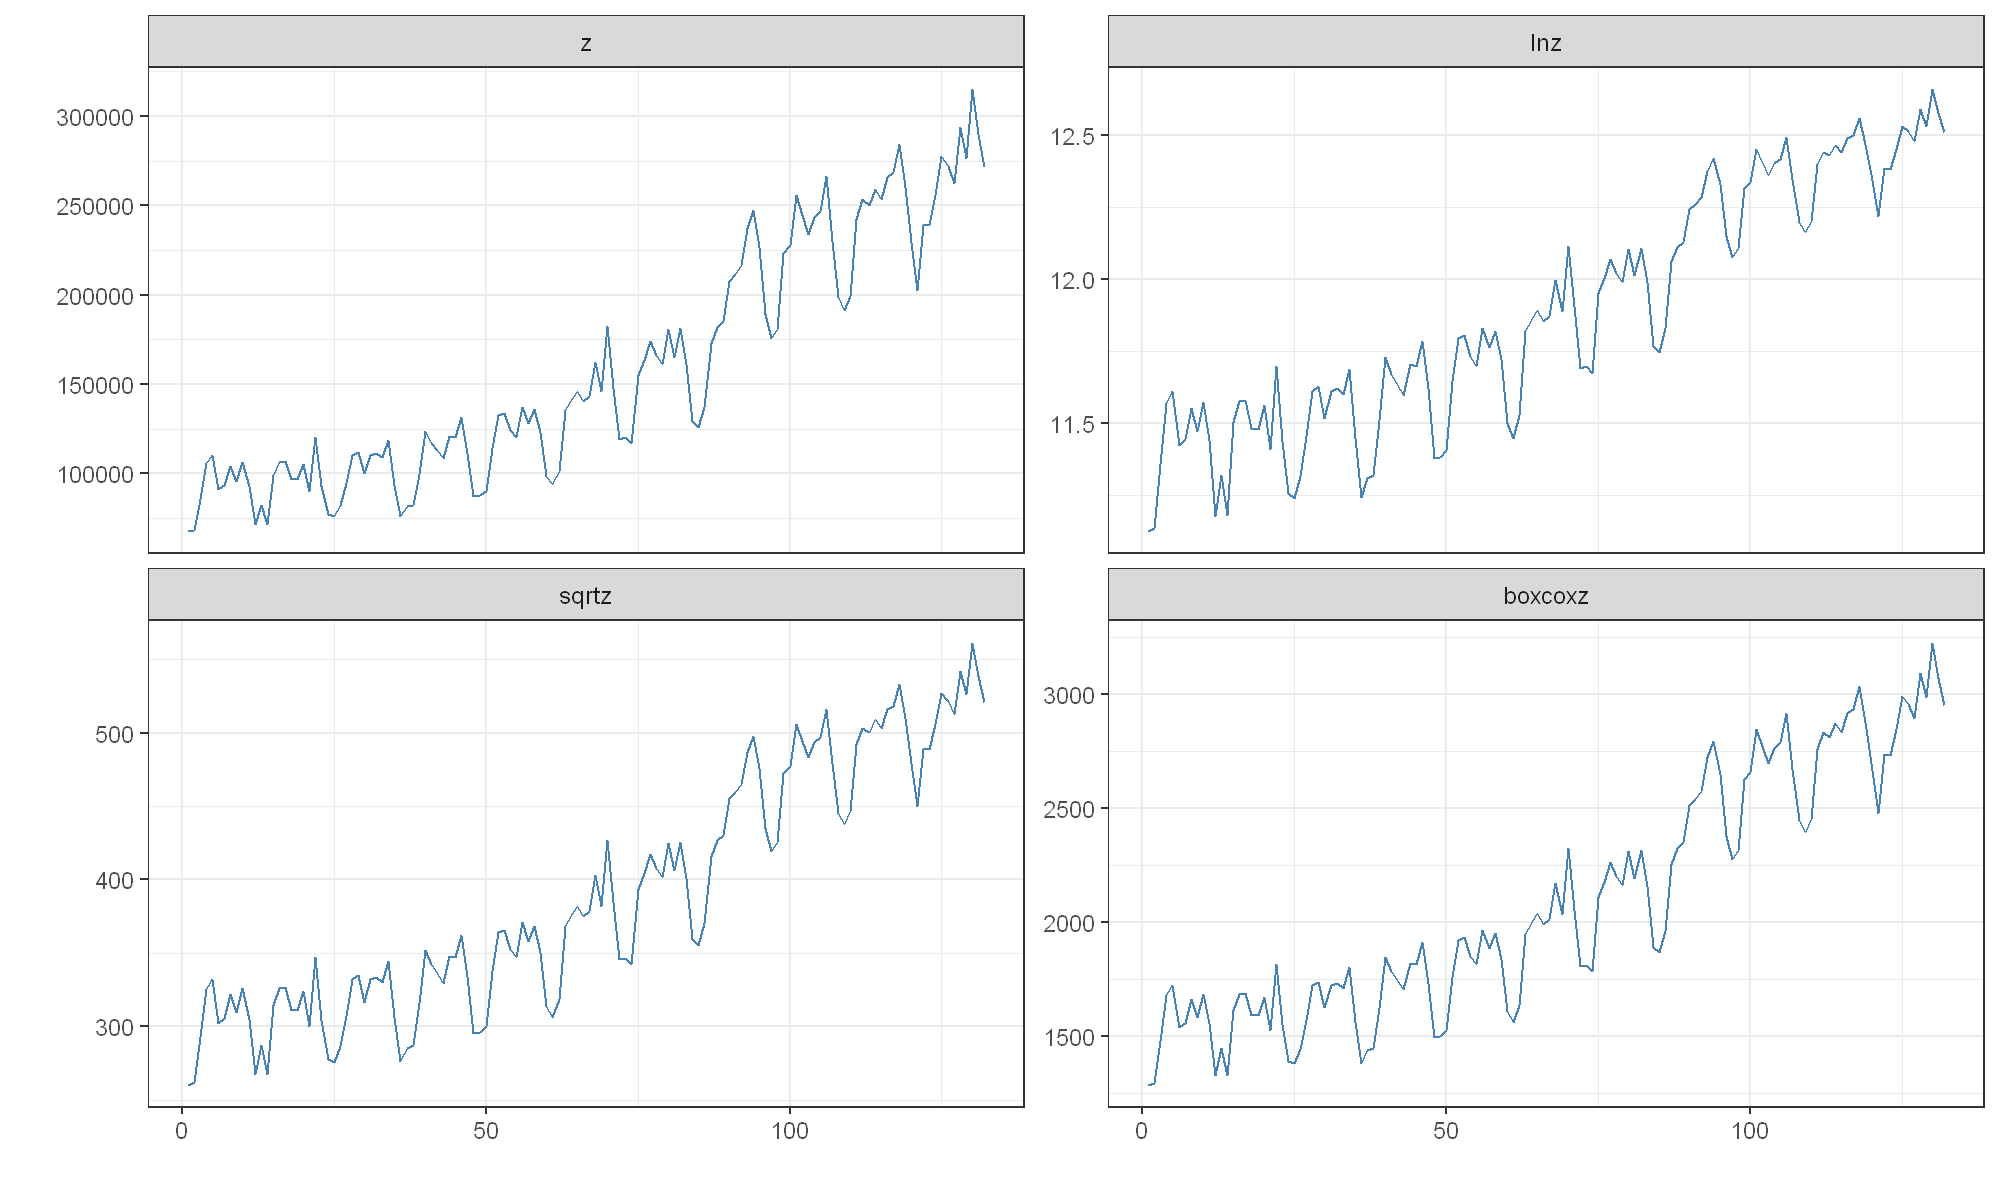

In [20]:
melt.dt <- melt(dt, id=1)
ggplot(melt.dt, aes(t, value)) + 
  geom_line(col='steelblue') +
  xlab("")+ylab('')+ 
  facet_wrap(variable~.,nrow=2, scales = "free_y")+
  theme_bw()

* ÎπÑÍµê Í≤∞Í≥º : sqrtÎ•º Ïù¥Ïö©ÌïòÏó¨ ÌïòÎäî Í≤ÉÏù¥ Î∞îÎûåÏßÅÌïòÎã§Îäî ÏÉùÍ∞ÅÏù¥ ÎìúÎÇò Ï±ÖÏóêÏÑúÎäî Î°úÍ∑∏Î≥ÄÌôòÏùÑ ÌïòÏòÄÏúºÎØÄÎ°ú Ï†àÏ∞®Î•º Îî∞Î•¥Ïûê

### Î°úÍ∑∏Î≥ÄÌôò ÌõÑ ÏãúÎèÑÌëú, ACF, PACF

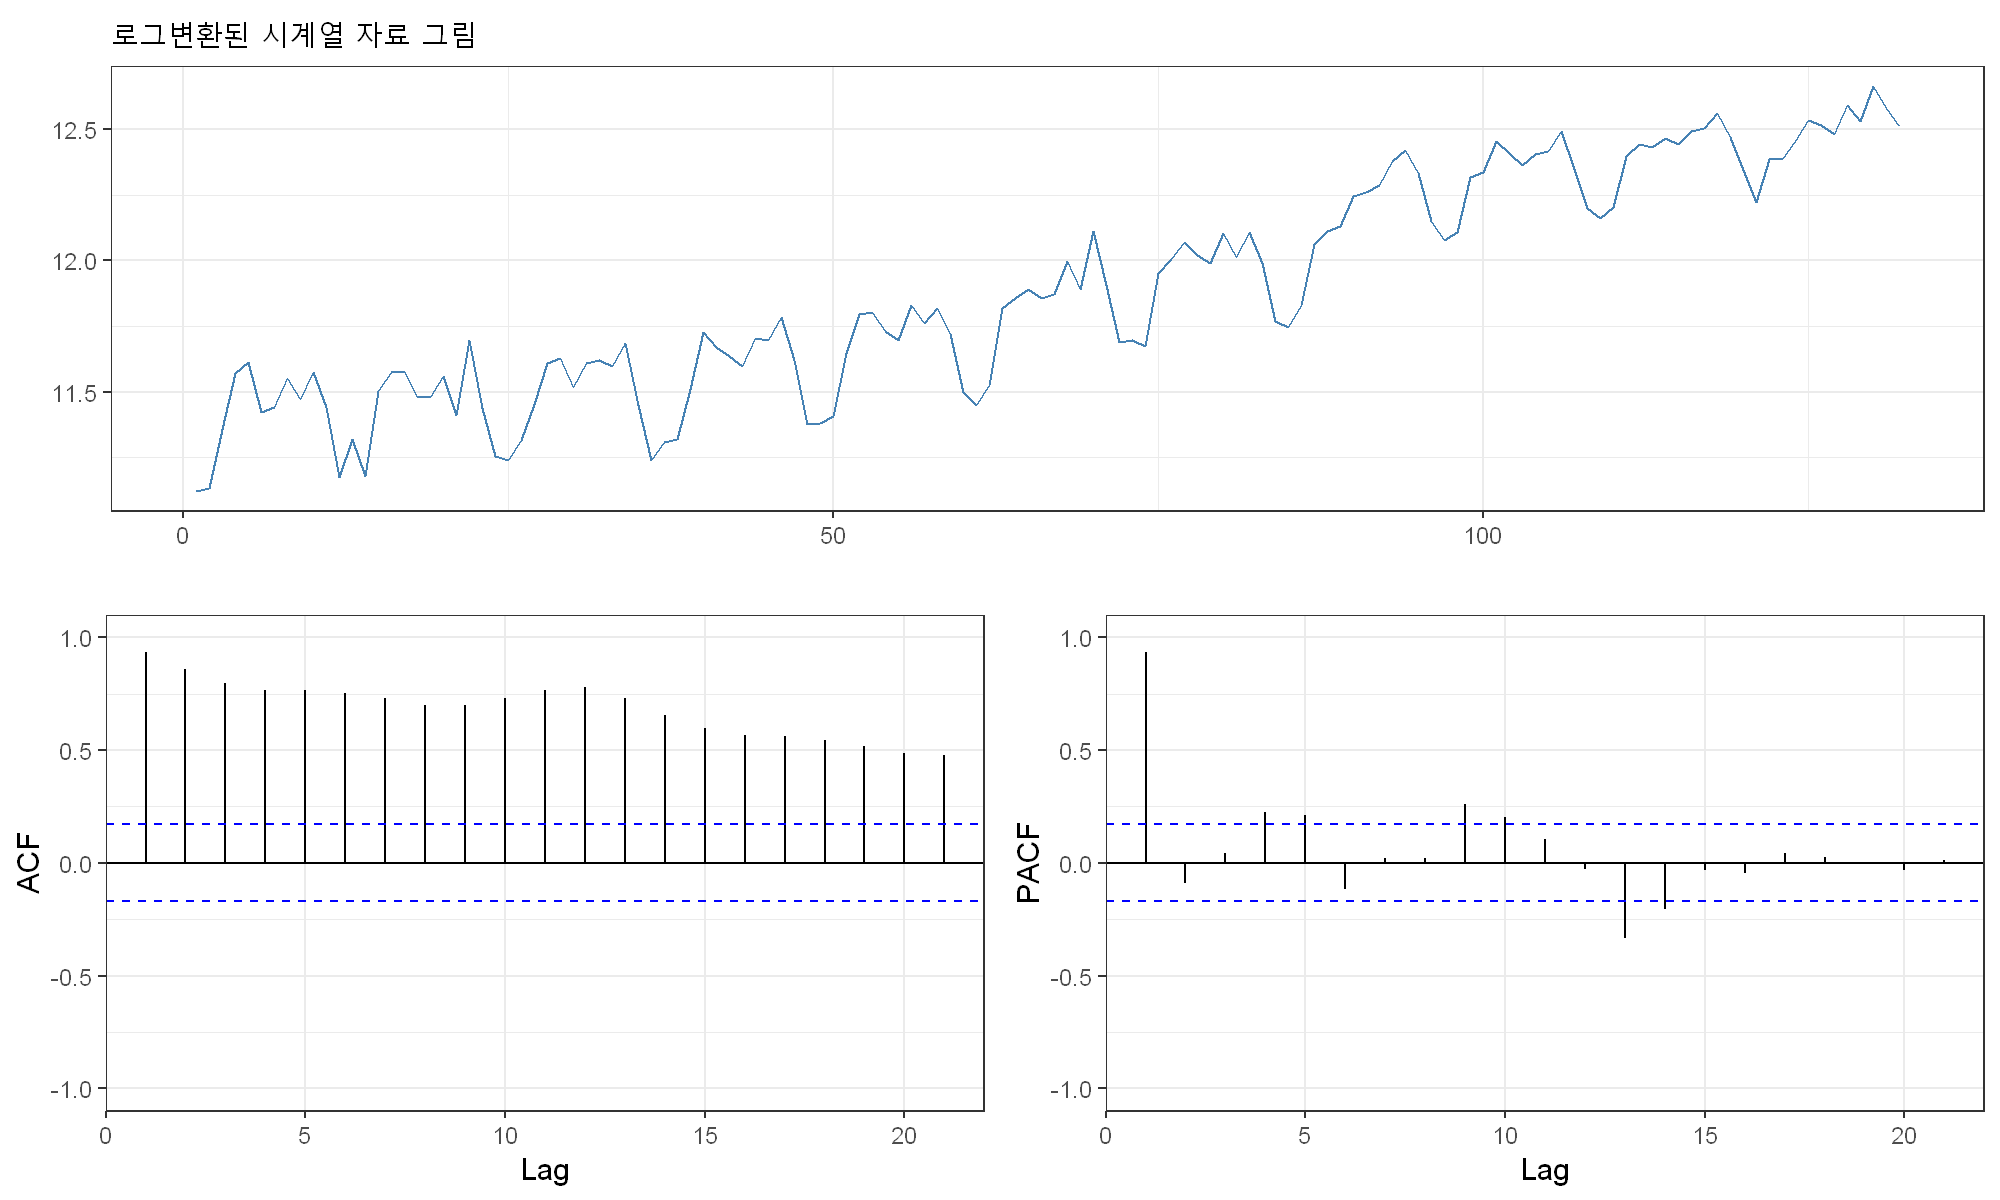

In [21]:
p3 <- ggplot(dt, aes(t, lnz)) + 
  geom_line(col='steelblue') +
  xlab("")+ylab('')+ ggtitle('Î°úÍ∑∏Î≥ÄÌôòÎêú ÏãúÍ≥ÑÏó¥ ÏûêÎ£å Í∑∏Î¶º')+
  theme_bw()

p1 <- ggAcf(dt$lnz) + 
  theme_bw() + ylim(-1,1) +
  theme(plot.title = element_blank())

p2 <- ggPacf(dt$lnz) + 
  theme_bw() +ylim(-1,1) +
  theme(plot.title = element_blank())

grid.arrange(p3, p1, p2, nrow = 2,
             layout_matrix = rbind(c(1,1),
                                   c(2,3)))

* ÏãúÎèÑÌëúÏóêÏÑú Í≥ÑÏ†àÏÑ±Î∂ÑÍ≥º Ï∂îÏÑ∏ÏÑ±Î∂ÑÏù¥ Í¥ÄÏ∏°ÎêòÏóàÎã§.

* ÎòêÌïú ACFÎ•º Î≥¥Î©¥ ÏßÄÏàòÏ†ÅÏúºÎ°ú Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•Ïù¥ Î≥¥Ïù¥ÎäîÎç∞ Í≥ÑÏ†àÏÑ±Î∂ÑÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÌòïÌÉúÎ•º ÏßÄÎãåÎã§.

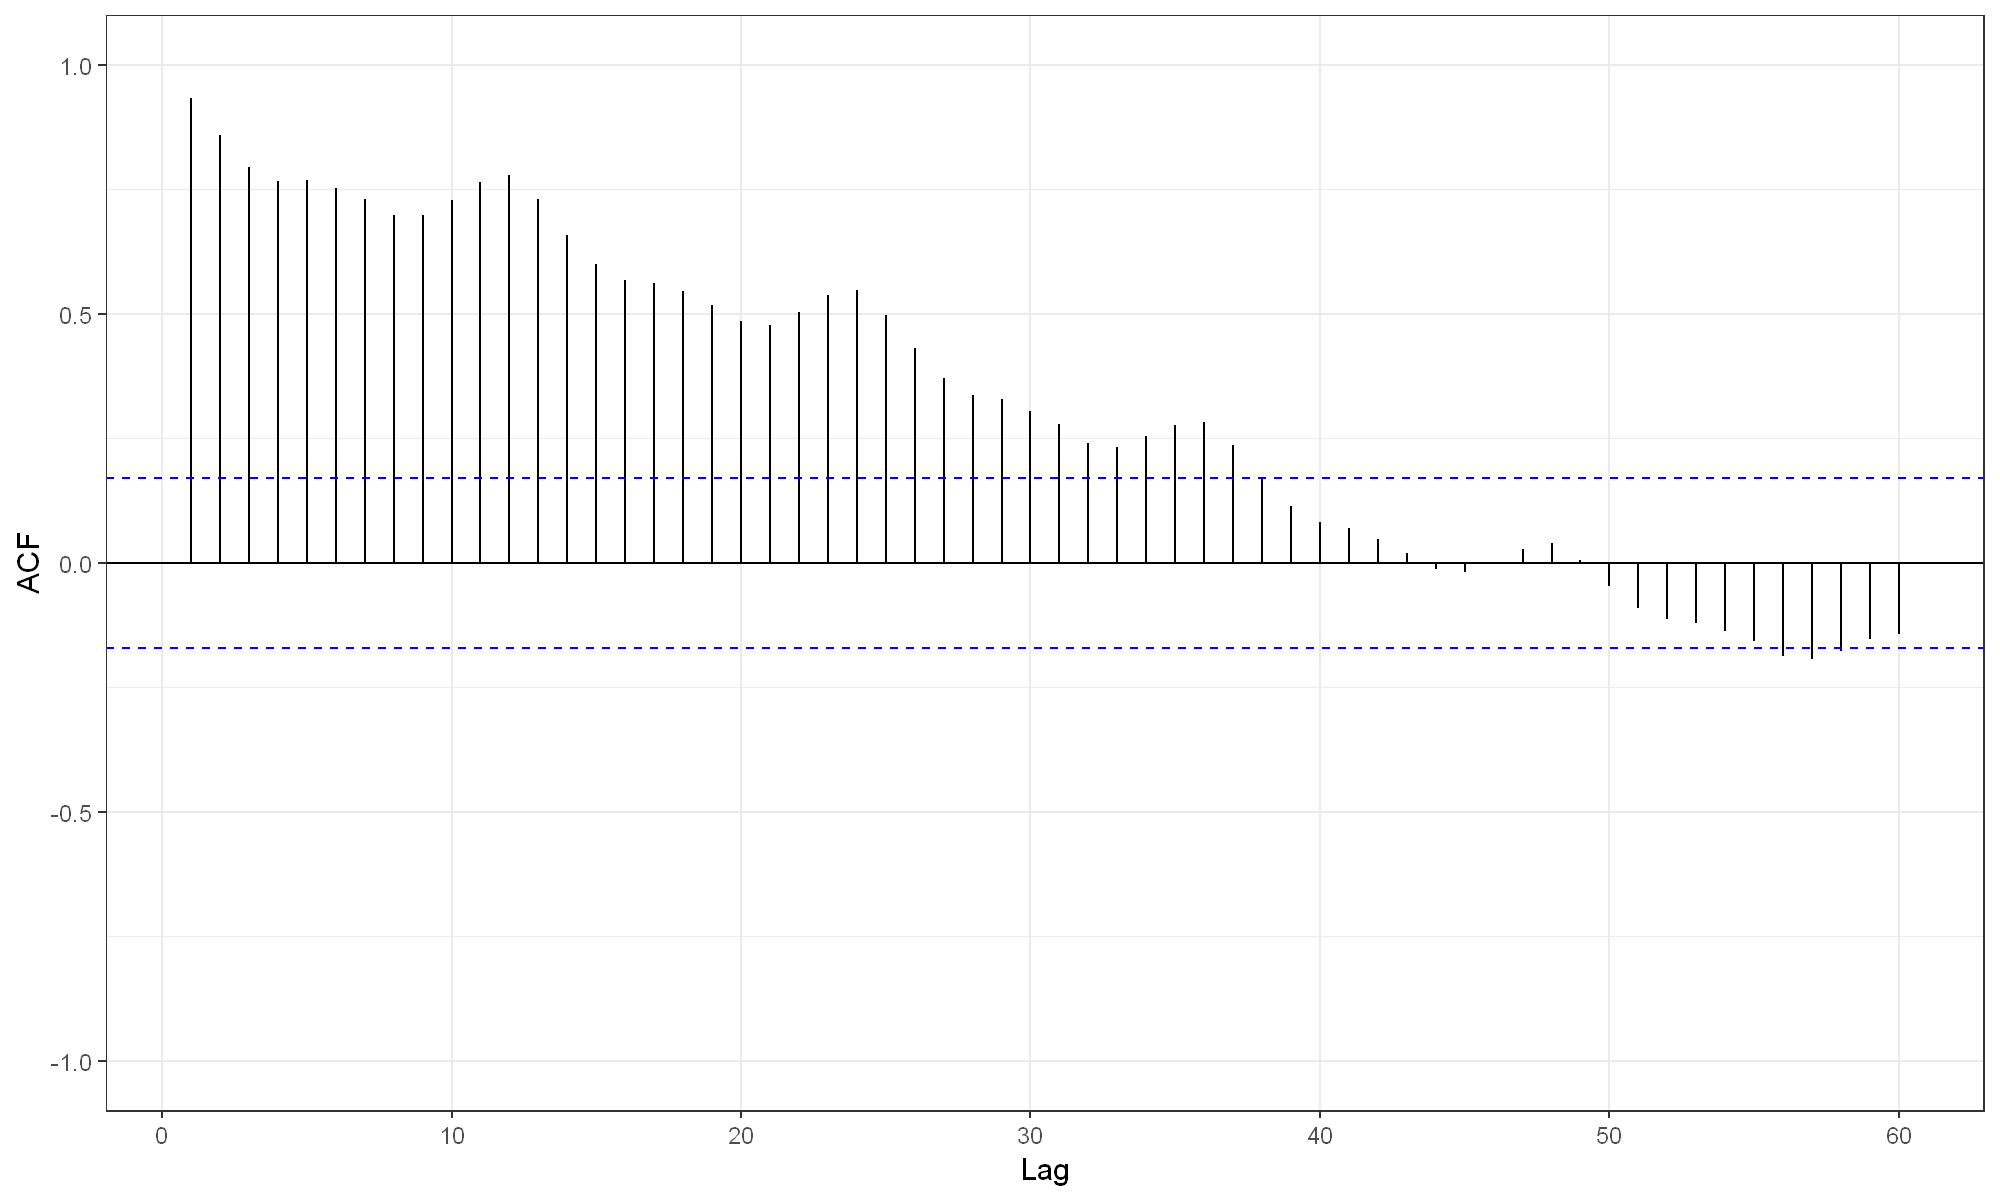

In [23]:
ggAcf(dt$lnz,lag.max = 60) + 
  theme_bw() + ylim(-1,1) +
  theme(plot.title = element_blank())

* ÏßÄÏàòÏ†ÅÏúºÎ°ú Í∞êÏÜåÌïòÎÇò Ï§ëÍ∞ïÏ§ëÍ∞Ñ Ïò¨Í∏ãÎ≥ºÍ∏ãÌïú Í≤ÉÏù¥ Î≥¥Ïù¥ÎäîÎç∞ Ïù¥Í≤ÉÏùÄ Í≥ÑÏ†à Ï∞®Î∂ÑÏù¥ ÌïÑÏöîÌïú ÌäπÏÑ±ÏûÑ

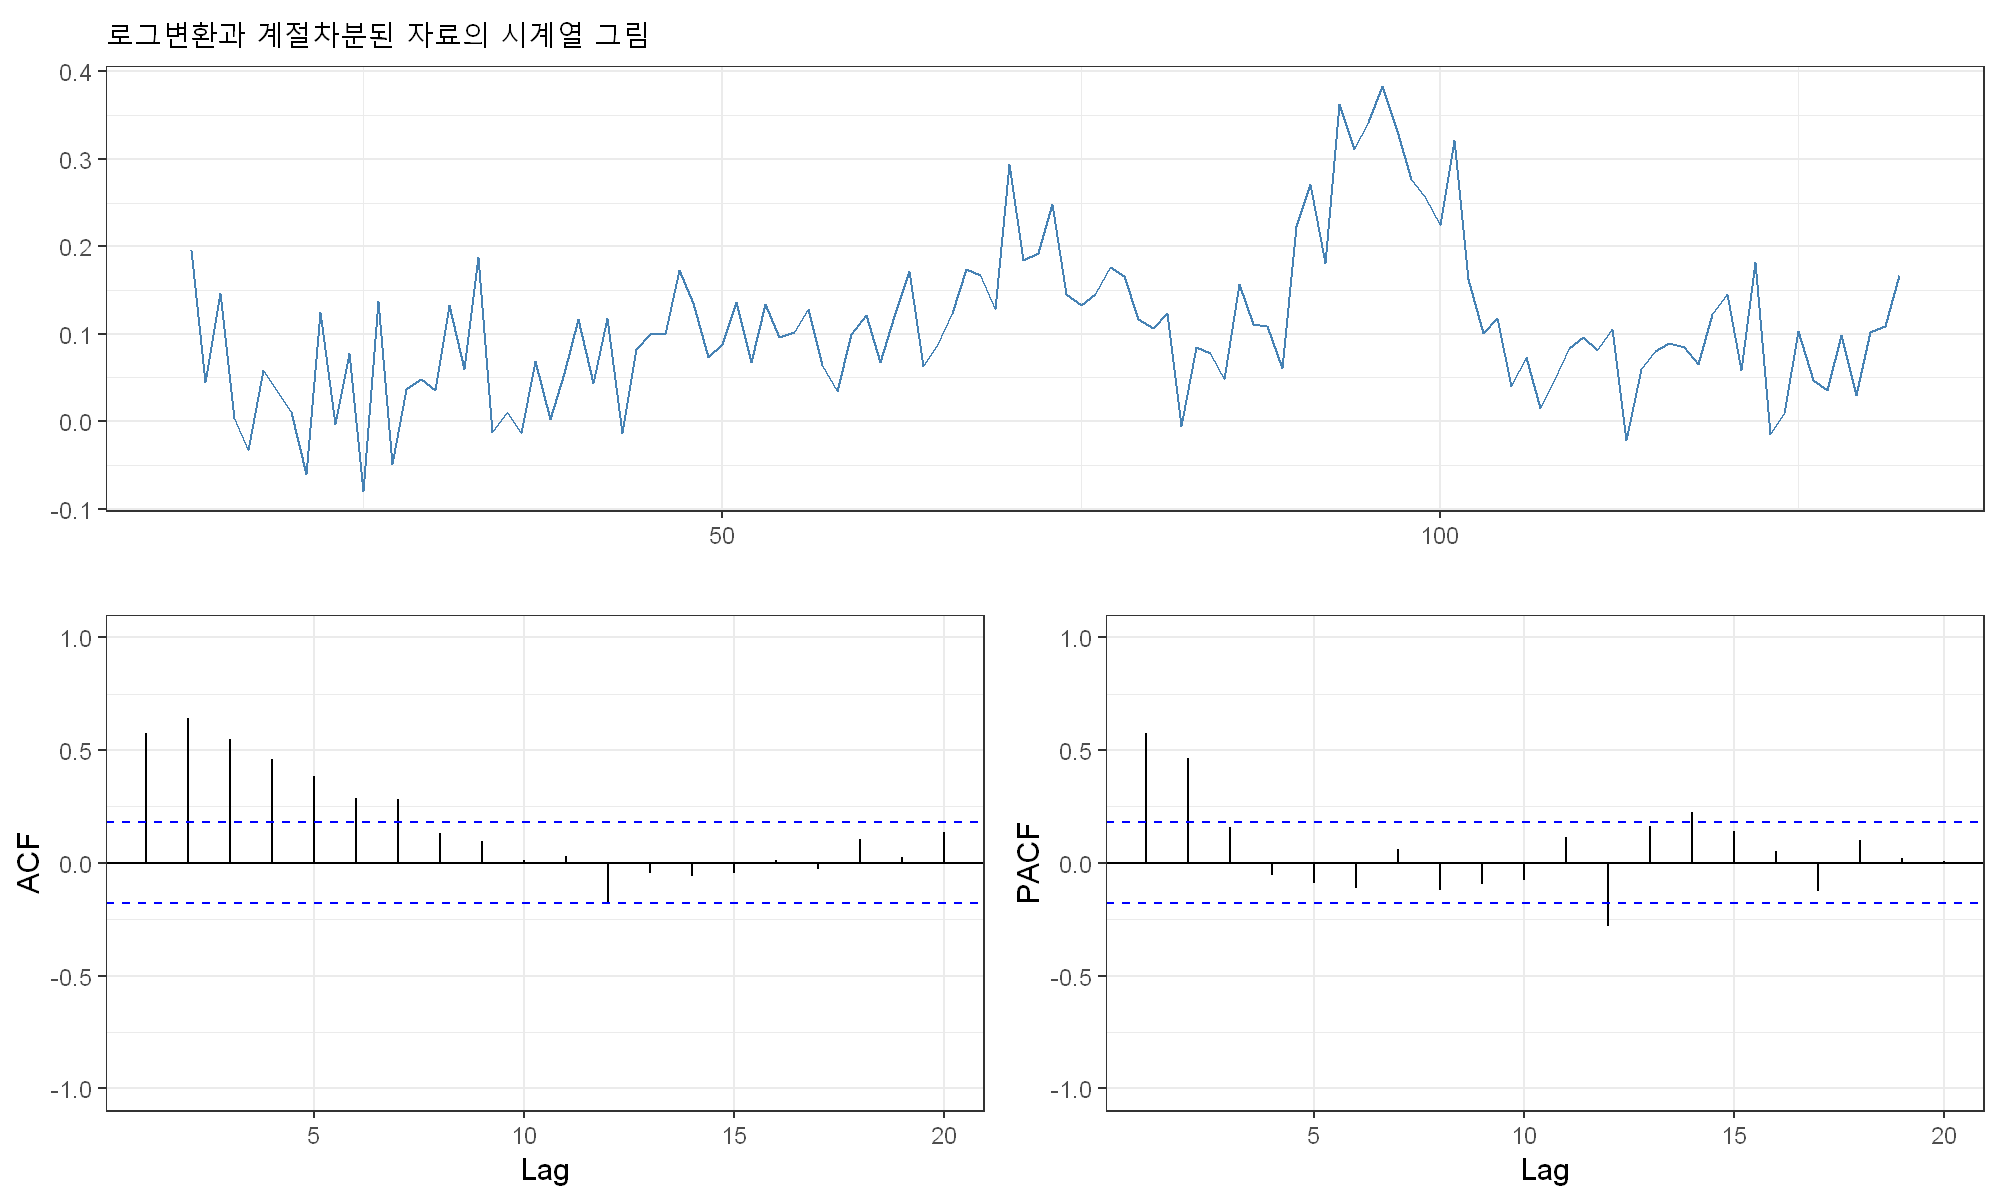

In [24]:
dt[, df12_lnz := c(rep(0,12), diff(lnz,12))]
sdt <- dt[-(1:12)]

p3 <- ggplot(sdt, aes(t, df12_lnz)) + 
  geom_line(col='steelblue') +
  xlab("")+ylab('')+ ggtitle('Î°úÍ∑∏Î≥ÄÌôòÍ≥º Í≥ÑÏ†àÏ∞®Î∂ÑÎêú ÏûêÎ£åÏùò ÏãúÍ≥ÑÏó¥ Í∑∏Î¶º')+
  theme_bw()

p1 <- ggAcf(sdt$df12_lnz) + 
  theme_bw() + ylim(-1,1) +
  theme(plot.title = element_blank())

p2 <- ggPacf(sdt$df12_lnz) + 
  theme_bw() +ylim(-1,1) +
  theme(plot.title = element_blank())

grid.arrange(p3, p1, p2, nrow = 2,
             layout_matrix = rbind(c(1,1),
                                   c(2,3)))

* ACFÏùò Í≤ΩÏö∞ Ï≤úÏ≤úÌûà Í∞êÏÜåÌïúÎã§.
* Îã®ÏúÑÍ∑º Í≤ÄÏ†ïÏùÑ ÌÜµÌï¥ Í≤ÄÏ†ï

In [26]:
adfTest(sdt$df12_lnz, lags = 0, type = "c")
adfTest(sdt$df12_lnz, lags = 1, type = "c")
adfTest(sdt$df12_lnz, lags = 2, type = "c")

Warning message in adfTest(sdt$df12_lnz, lags = 0, type = "c"):
"p-value smaller than printed p-value"



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 0
  STATISTIC:
    Dickey-Fuller: -5.6041
  P VALUE:
    0.01 

Description:
 Thu Dec 09 16:49:41 2021 by user: lee



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -2.9255
  P VALUE:
    0.04669 

Description:
 Thu Dec 09 16:49:41 2021 by user: lee



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -2.4004
  P VALUE:
    0.1661 

Description:
 Thu Dec 09 16:49:41 2021 by user: lee


* Í≤ÄÏ†ïÍ≤∞Í≥º lag 2ÏóêÏÑú Îã®ÏúÑÍ∑ºÏù¥ ÏûàÎã§Í≥† ÌåêÎã®Îê®

### lag2ÏóêÏÑú Îã§Ïãú Ï∞®Î∂Ñ

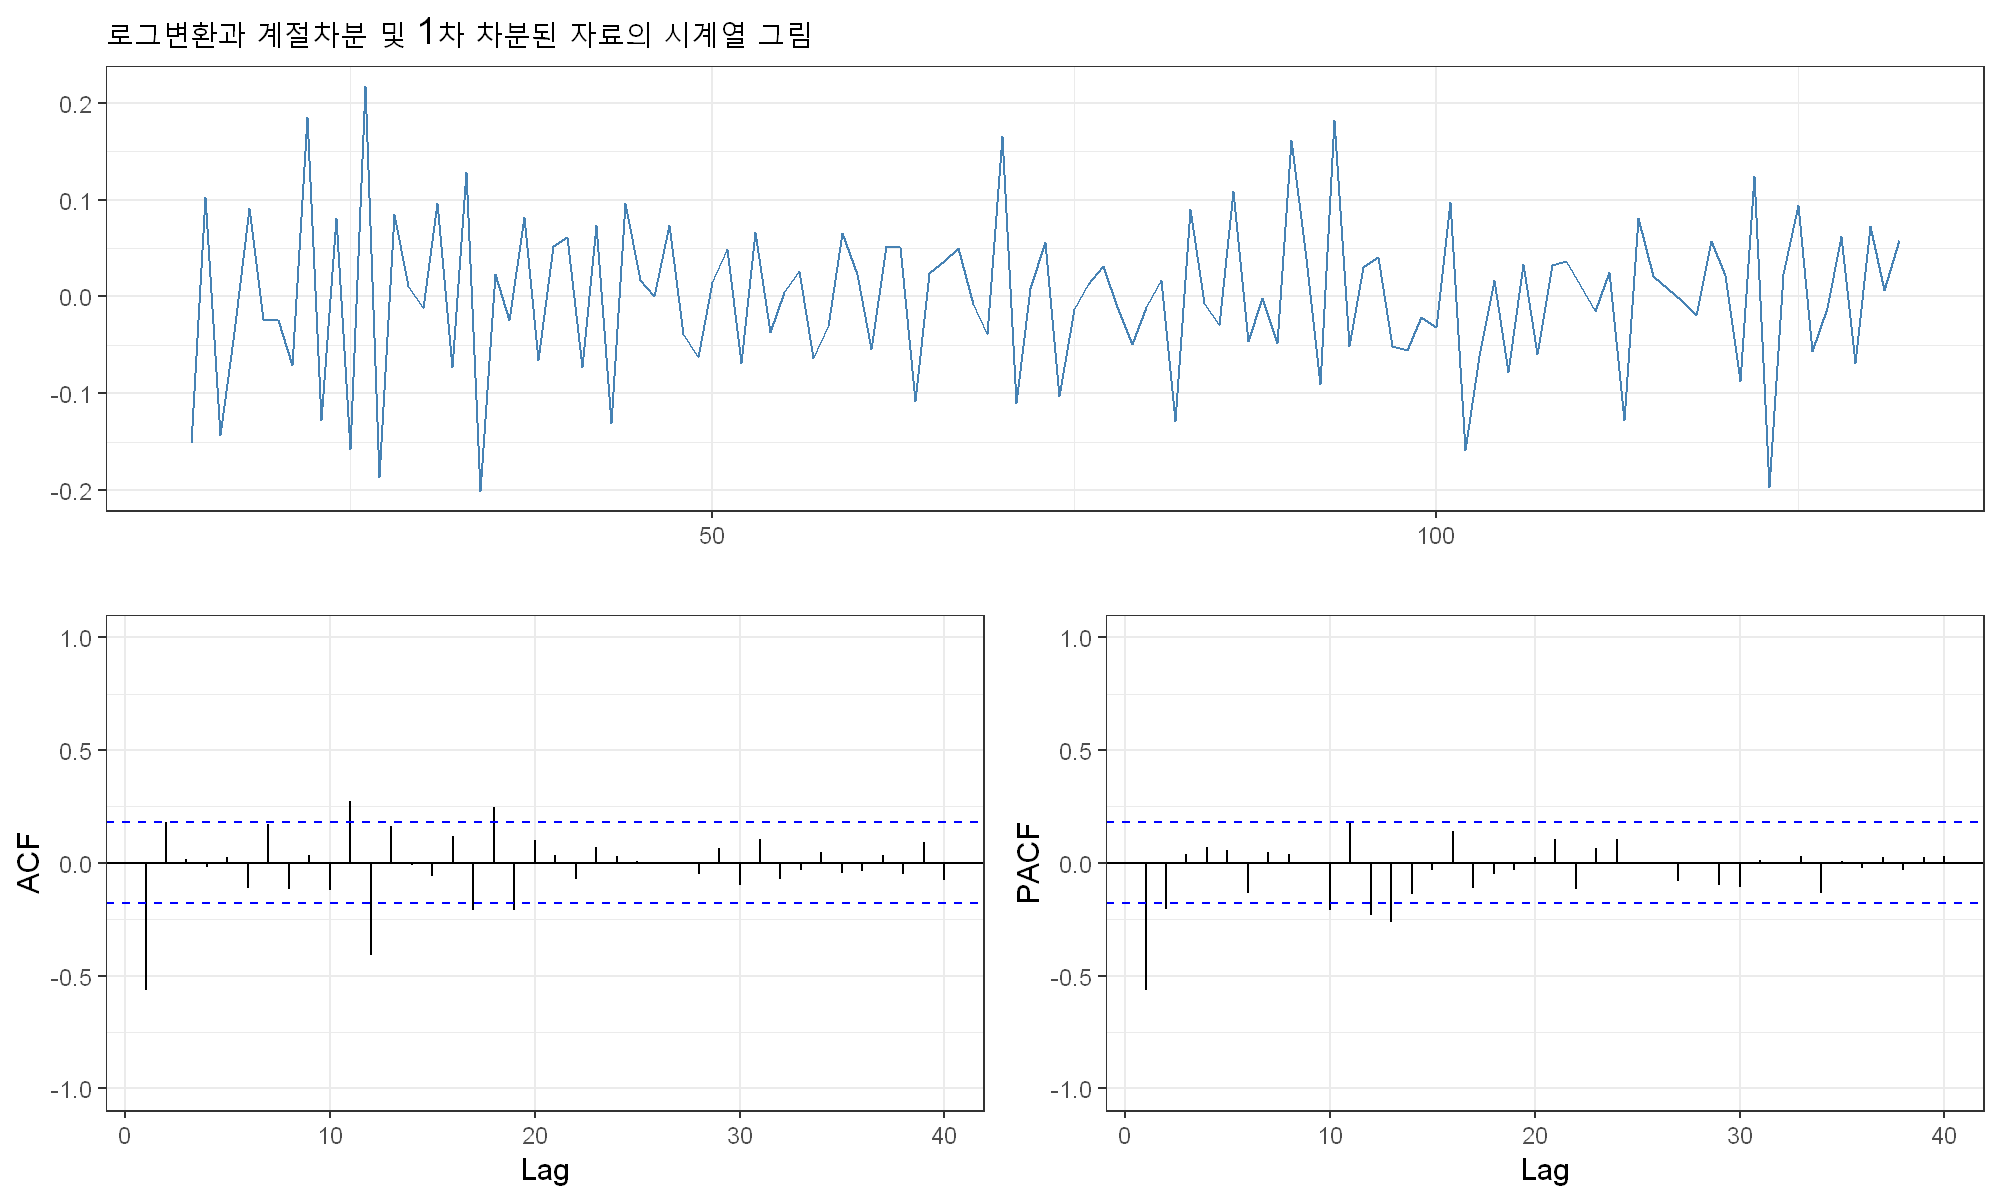

In [27]:
sdt[, df1_df12_lnz := c(0, diff(df12_lnz))]
ssdt <- sdt[-1,]

p3 <- ggplot(ssdt, aes(t, df1_df12_lnz)) + 
  geom_line(col='steelblue') +
  xlab("")+ylab('')+ ggtitle('Î°úÍ∑∏Î≥ÄÌôòÍ≥º Í≥ÑÏ†àÏ∞®Î∂Ñ Î∞è 1Ï∞® Ï∞®Î∂ÑÎêú ÏûêÎ£åÏùò ÏãúÍ≥ÑÏó¥ Í∑∏Î¶º')+
  theme_bw()

p1 <- ggAcf(ssdt$df1_df12_lnz, lag.max = 40) + 
  theme_bw() + ylim(-1,1) +
  theme(plot.title = element_blank())

p2 <- ggPacf(ssdt$df1_df12_lnz, lag.max = 40) + 
  theme_bw() +ylim(-1,1) +
  theme(plot.title = element_blank())

grid.arrange(p3, p1, p2, nrow = 2,
             layout_matrix = rbind(c(1,1),
                                   c(2,3)))


* acfÎ•º Î≥¥Î©¥ MA(1), PACFÎ•º Î≥¥Î©¥ AR(1)ÏùÑ Í≥†Î†§Ìóê Ïàò ÏûàÎã§.

* ÎòêÌïú lag 12 ÏóêÏÑú Í∞ÅÍ∞Å Ïú†ÏùòÌïú Í∞íÏùÑ Î≥¥Ïù∏Îã§.

* acfÎ•º Î≥¥Î©¥ SMA(1), pacfÎ•º Î≥¥Î©¥ SAR(1) Î™®ÌòïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÎã§. 

* ÎòêÌïú Ï†ÄÎ≤àÏãúÍ∞ÑÏóê Î∞∞Ïö¥ Í≤ÉÏ≤òÎüº $Arima(1,0,0)(1,0,0)_{12}$ Ïù¥Îü∞ Í≤ΩÏö∞ 12ÏãúÏ∞®ÏóêÏÑú pacfÍ∞íÏù¥ ÏñëÏ™ΩÏãúÏ∞®ÏóêÏÑú Ïú†ÏùòÌïú Í≤ΩÏö∞Î•º Í∞ÑÌòπ Î≥º Ïàò ÏûàÎã§.

* Í≤∞Î°† : MAÏ∞®Ïàò p=1, sma Ï∞®Ïàò =1 Î°ú ÌïòÏó¨ Î™®ÌòïÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†Îã§.(ÏïûÏóêÏÑú Í≥ÑÏ†àÏ∞®Î∂Ñ Î∞è 1Ï∞®Ï∞®Î∂ÑÏùÑ ÏãúÌñâÌñàÏùå)
    * $\ln z \to ARIMA(0,1,1)(0,1,1)_{12}$Î™®ÌòïÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†Îã§.(Ï±ÖÏóêÏÑú Ïù¥Î†áÍ≤å ÌñàÏùå.,.)

## Î™®ÌòïÏ†ÅÌï© ùê¥ùëÖùêºùëÄùê¥(0,1,1)(0,1,1)_12 

In [31]:
fit1 = arima(dt$lnz, order = c(0,1,1), seasonal = list(order = c(0,1,1), 
                                                      period = 12))
fit1


Call:
arima(x = dt$lnz, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.5800  -0.5525
s.e.   0.0698   0.0791

sigma^2 estimated as 0.003281:  log likelihood = 169.06,  aic = -332.13

### ÏûîÏ∞®Î∂ÑÏÑù

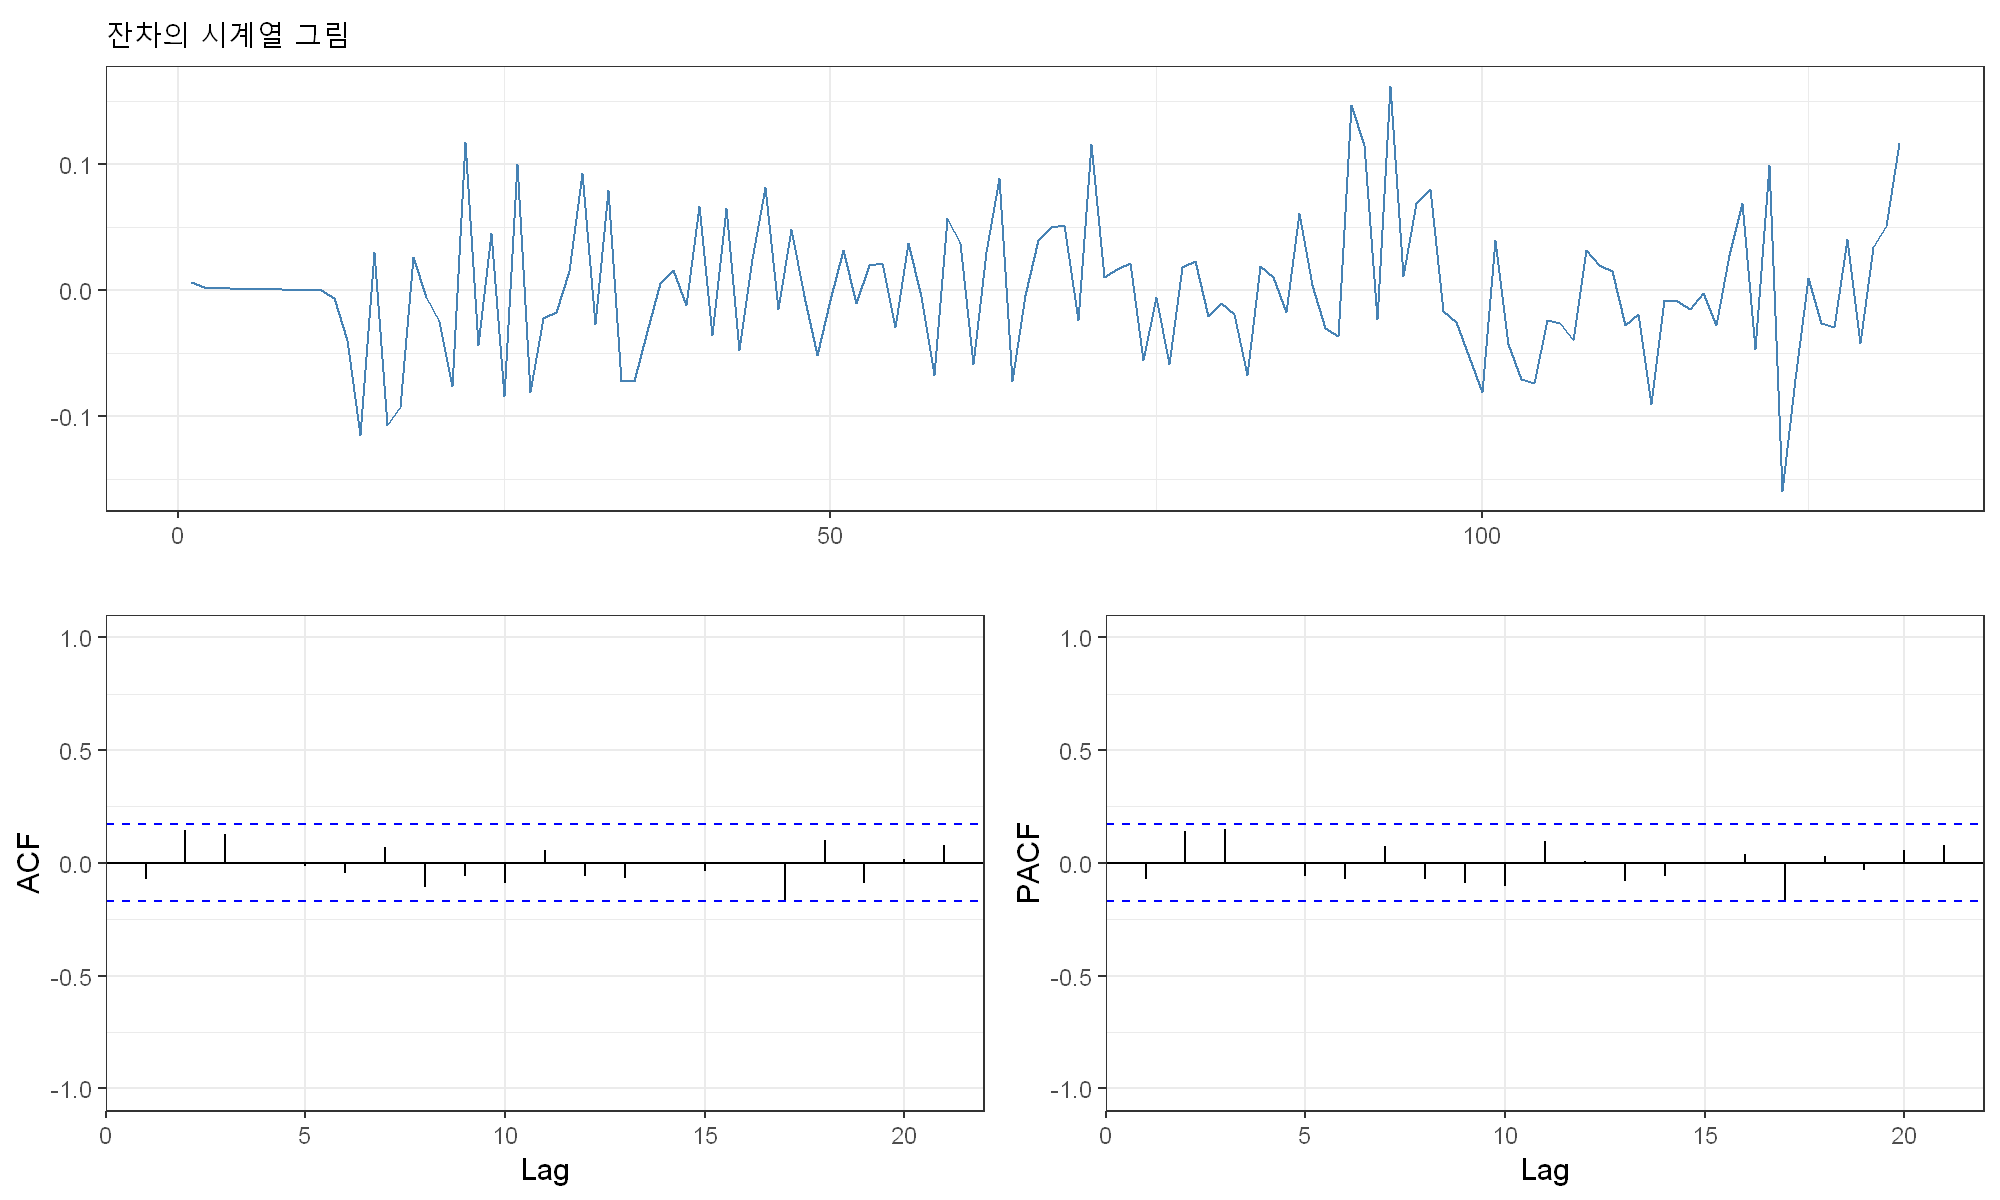

In [32]:
dt[, res := as.numeric(resid(fit1))]

p3 <- ggplot(dt, aes(t, res)) + 
  geom_line(col='steelblue') +
  xlab("")+ylab('')+ ggtitle('ÏûîÏ∞®Ïùò ÏãúÍ≥ÑÏó¥ Í∑∏Î¶º')+
  theme_bw()

p1 <- ggAcf(dt$res) + 
  theme_bw() + ylim(-1,1) +
  theme(plot.title = element_blank())

p2 <- ggPacf(dt$res) + 
  theme_bw() +ylim(-1,1) +
  theme(plot.title = element_blank())

grid.arrange(p3, p1, p2, nrow = 2,
             layout_matrix = rbind(c(1,1),
                                   c(2,3)))

In [33]:
LjungBox(fit1, lags=seq(6,24,6))

lags statistic df p-value  
  6    6.161299  4 0.1874219
 12   11.263183 10 0.3373847
 18   17.902458 16 0.3296397
 24   26.059604 22 0.2491317

## Î™®ÌòïÏ†ÅÌï©  ARIMA(0,1,1)(1,1,0)_12

In [35]:
fit2 = arima(dt$lnz, order = c(0,1,1), 
             seasonal = list(order = c(1,1,0),  period = 12));  fit2


Call:
arima(x = dt$lnz, order = c(0, 1, 1), seasonal = list(order = c(1, 1, 0), period = 12))

Coefficients:
          ma1     sar1
      -0.6054  -0.5366
s.e.   0.0665   0.0810

sigma^2 estimated as 0.003276:  log likelihood = 169.28,  aic = -332.56

### ÏûîÏ∞®Î∂ÑÏÑù

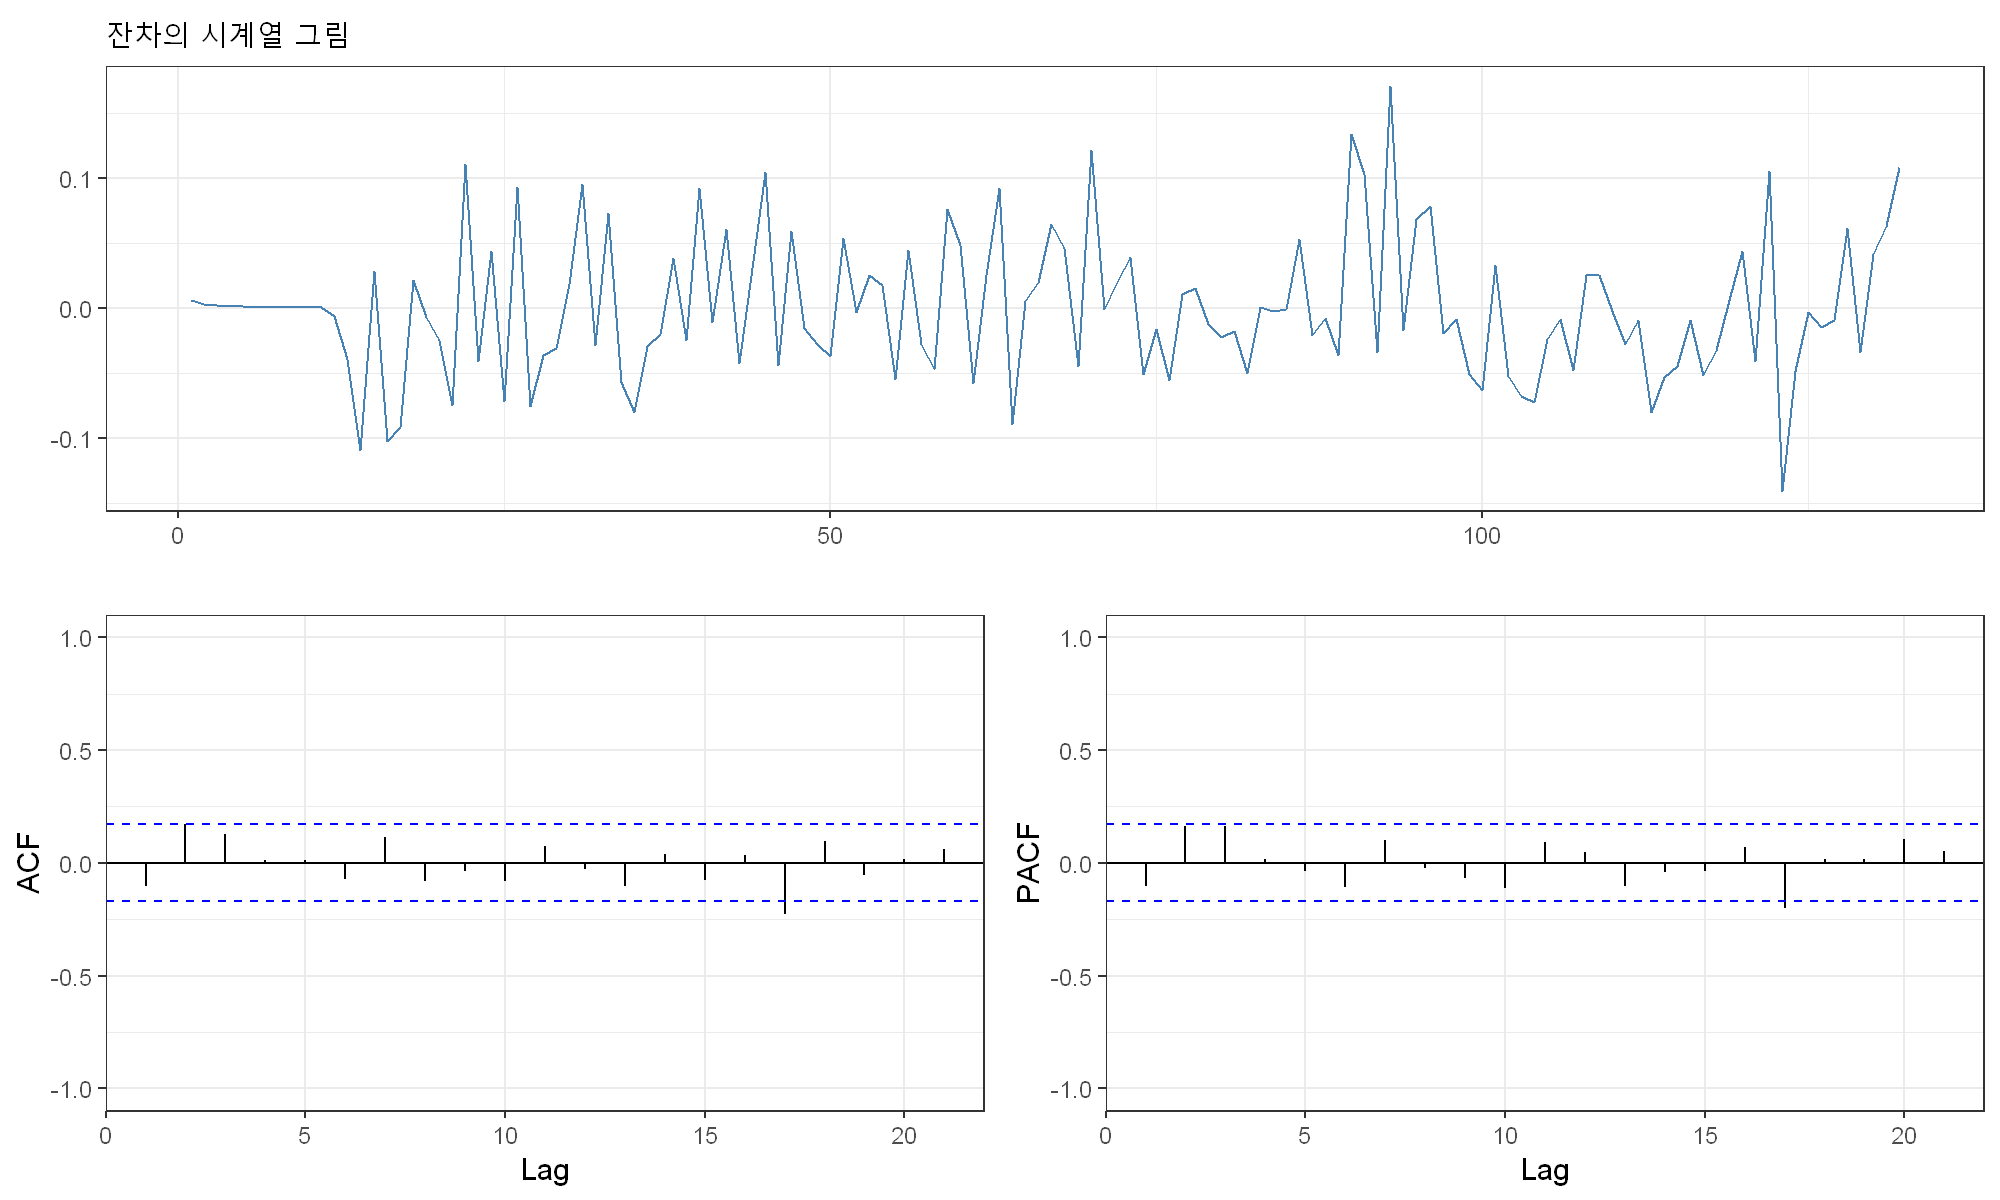

In [39]:
dt[, res2 := as.numeric(resid(fit2))]

p3 <- ggplot(dt, aes(t, res2)) + 
  geom_line(col='steelblue') +
  xlab("")+ylab('')+ ggtitle('ÏûîÏ∞®Ïùò ÏãúÍ≥ÑÏó¥ Í∑∏Î¶º')+
  theme_bw()

p1 <- ggAcf(dt$res2) + 
  theme_bw() + ylim(-1,1) +
  theme(plot.title = element_blank())

p2 <- ggPacf(dt$res2) + 
  theme_bw() +ylim(-1,1) +
  theme(plot.title = element_blank())

grid.arrange(p3, p1, p2, nrow = 2,
             layout_matrix = rbind(c(1,1),
                                   c(2,3)))

In [40]:
LjungBox(fit2, lags=seq(6,24,6))

lags statistic df p-value   
  6    8.371571  4 0.07887711
 12   13.137631 10 0.21607822
 18   25.447443 16 0.06231600
 24   38.216710 22 0.01732204

* lag 18ÏóêÏÑú ÏûîÏ∞®Ïùò ÏûêÍ∏∞ÏÉÅÍ¥ÄÏù¥ Ï°¥Ïû¨ÌïòÎã§Îäî Í≤∞Î°†Ïù¥ ÎÇòÏò¥

In [42]:
fit1;fit2


Call:
arima(x = dt$lnz, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.5800  -0.5525
s.e.   0.0698   0.0791

sigma^2 estimated as 0.003281:  log likelihood = 169.06,  aic = -332.13


Call:
arima(x = dt$lnz, order = c(0, 1, 1), seasonal = list(order = c(1, 1, 0), period = 12))

Coefficients:
          ma1     sar1
      -0.6054  -0.5366
s.e.   0.0665   0.0810

sigma^2 estimated as 0.003276:  log likelihood = 169.28,  aic = -332.56

### ÏµúÏ¢ÖÍ≤∞Ï†ï

* ÏûîÏ∞® Í≤ÄÏ†ïÏãú Î¨∏Ï†úÍ∞Ä ÏóÜÎäî fit1ÏùÑ Ïì∞Í≤†Îã§Í≥† Í≤∞Î°†ÏùÑ ÎÇ¥Î¶¥ Ïàò ÏûàÏùå

# auto.arima : in forecast

* Í≥ÑÏ†àÏ∞®Î∂ÑÍ≥º ÏùºÎ∞òÏ∞®Î∂ÑÏùÑ 1Î≤àÏî© Ìïú Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©

In [47]:
auto.arima(ssdt$df1_df12_lnz)  

Series: ssdt$df1_df12_lnz 
ARIMA(2,0,0) with zero mean 

Coefficients:
          ar1      ar2
      -0.7016  -0.2128
s.e.   0.0902   0.0904

sigma^2 estimated as 0.00427:  log likelihood=156.55
AIC=-307.1   AICc=-306.89   BIC=-298.76

* ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÑ†ÌÉùÌïú Î™®Ìòï :  $ARIMA(2,1,0)(0,1,0)_{12}$

In [48]:
auto.arima(ssdt$df1_df12_lnz, trace=T, ic='aic')


 ARIMA(2,0,2) with non-zero mean : Inf
 ARIMA(0,0,0) with non-zero mean : -256.2744
 ARIMA(1,0,0) with non-zero mean : -301.7002
 ARIMA(0,0,1) with non-zero mean : -298.6352
 ARIMA(0,0,0) with zero mean     : -258.2734
 ARIMA(2,0,0) with non-zero mean : -305.1014
 ARIMA(3,0,0) with non-zero mean : -303.1217
 ARIMA(2,0,1) with non-zero mean : -303.1156
 ARIMA(1,0,1) with non-zero mean : -304.21
 ARIMA(3,0,1) with non-zero mean : -301.2377
 ARIMA(2,0,0) with zero mean     : -307.1012
 ARIMA(1,0,0) with zero mean     : -303.7
 ARIMA(3,0,0) with zero mean     : -305.1216
 ARIMA(2,0,1) with zero mean     : -305.1155
 ARIMA(1,0,1) with zero mean     : -306.2097
 ARIMA(3,0,1) with zero mean     : -303.2374

 Best model: ARIMA(2,0,0) with zero mean     



Series: ssdt$df1_df12_lnz 
ARIMA(2,0,0) with zero mean 

Coefficients:
          ar1      ar2
      -0.7016  -0.2128
s.e.   0.0902   0.0904

sigma^2 estimated as 0.00427:  log likelihood=156.55
AIC=-307.1   AICc=-306.89   BIC=-298.76

### not auto.arima

In [50]:
fit3 = arima(ssdt$df1_df12_lnz, order = c(0,0,1), 
             seasonal = list(order = c(0,0,1),  period = 12))
fit3


Call:
arima(x = ssdt$df1_df12_lnz, order = c(0, 0, 1), seasonal = list(order = c(0, 
    0, 1), period = 12))

Coefficients:
          ma1     sma1  intercept
      -0.5822  -0.5574     0.0006
s.e.   0.0701   0.0798     0.0011

sigma^2 estimated as 0.003272:  log likelihood = 169.18,  aic = -330.37

* auto.arimaÎ•º Ïì∞Î©¥ Í≥ÑÏ†àÌòï Ï∞®ÏàòÎ•º Ï∞æÏïÑÏ£ºÏßÄ ÏïäÏùå Ï¶â Í≥ÑÏ†àÌòï ARMA Î™®ÌòïÏùÑ Í≥†Î†§Ìï† Ïàò ÏóÜÎã§Îäî Í≤ÉÏù¥Îã§.

* ÏúÑ Ï≤òÎüº ÏßÅÏ†ë Î™®ÌòïÏùÑ Ï†ÅÌï©Ìïú Í≤ΩÏö∞Ïùò AIC Í∞íÏù¥ Îçî ÎÇÆÏùÄ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏóàÎã§.Ïã¨ÏßÄÏñ¥ mse(sigma^2 estimated)Í∞íÎèÑ Îçî ÎÇÆÏïóÏùå

* Ï¶â auto.arima Îäî Ï∞∏Í≥†Ïö©ÏúºÎ°ú Ïì∞Ïûê...